## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import pylab as py
import import_ipynb
import Template as t
import Assignment_7_template as t2

importing Jupyter notebook from Template.ipynb
importing Jupyter notebook from Assignment_7_template.ipynb


In [2]:
df=t.load_data('csv')

Enter path of filecleaned_data.csv


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,shipped_quantity,delivered_quantity,shipped_status,delivered_status,unit_price,total_amount_expected,order_date,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category
0,Abdul ahad,"Makhdooom Bilawal Main Rd, Gulzar-e-Hijri Sect...",CUSTOMER_APP,2020-12-30 13:44:1609335875,2021-01-09 10:45:1610189149,2021-01-09 18:40:1610217631,0.0,0.0,1668,Mezan Canola Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,117000.0,11700000.0,2020-12-30 00:00:00,2021-05-20 13:44:00,2021-01-09 00:00:00,2021-05-20 10:45:00,2021-01-09 00:00:00,2021-05-20 18:40:00,10.0,7.916667,0,Oil aur Ghee,Oil
1,Naqeeb Ullah,Sector 1 New Karachi Town,CUSTOMER_APP,2020-12-30 07:16:1609312613,1970-01-01 00:00:1,1970-01-01 00:00:1,0.0,0.0,1668,Mezan Canola Oil 1 Litre Carton,0,0,NOT_DELIVERED,NOT_DELIVERED,9360.0,0.0,2020-12-30 00:00:00,2021-05-20 07:16:00,NaN,NaN,NaN,NaN,1.0,4.116667,1,Oil aur Ghee,Oil
2,ittefaq General Store,"Rashid Abad secter 4 A near gujjar palace, Sec...",TELESALES_COMMANDO,2020-12-31 06:18:1609395525,1970-01-01 00:00:1,1970-01-01 00:00:1,0.0,0.0,1421,2.5 Chakee 10 Kg - Champion,0,0,NOT_DELIVERED,NOT_DELIVERED,5400.0,0.0,2020-12-31 00:00:00,2021-05-20 06:18:00,NaN,NaN,NaN,NaN,1.0,3.975000,1,Aata,2.5 Chakee
3,ittefaq General Store,"Rashid Abad secter 4 A near gujjar palace, Sec...",TELESALES_COMMANDO,2020-12-31 06:18:1609395525,1970-01-01 00:00:1,1970-01-01 00:00:1,0.0,0.0,1463,Cheeni 50 Kg - Local,0,0,NOT_DELIVERED,NOT_DELIVERED,3950.0,0.0,2020-12-31 00:00:00,2021-05-20 06:18:00,NaN,NaN,NaN,NaN,1.0,3.975000,1,Cheeni,Cheeni
4,Malik Kashif,"St 16, Block 8, Karachi Administration Employe...",CUSTOMER_APP,2020-12-31 15:47:1609429634,2021-01-09 09:27:1610184450,2021-01-09 11:59:1610193550,0.0,0.0,1302,Ahla Banaspati Ghee 900 gm Carton,10,10,DELIVERED,DELIVERED,24000.0,240000.0,2020-12-31 00:00:00,2021-05-20 15:47:00,2021-01-09 00:00:00,2021-05-20 09:27:00,2021-01-09 00:00:00,2021-05-20 11:59:00,9.0,2.533333,0,Oil aur Ghee,Ghee


In [5]:
t.missing_details(df)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9412
customer_shipping_address,0.0,0,8630
channel,0.0,0,4
order_placement_date,0.0,0,131996
picked_timestamp,0.0,0,122144
drop_timestamp,0.0,0,102596
lat,0.0,0,10846
lng,0.0,0,9301
item_id,0.0,0,2049
item_name,0.0,0,888


In [6]:
df2=t.deep_copy(df)

For analysis only those records are important where shipped_quantity is not equal to zero because the objective is to predict the return of items 

In [7]:
df2=df2.loc[(df2['shipped_quantity']!=0)&(df2['shipped_status']!='NOT_DELIVERED')]

In [8]:
df=t.deep_copy(df2)

In [9]:
df

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,shipped_quantity,delivered_quantity,shipped_status,delivered_status,unit_price,total_amount_expected,order_date,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category
0,Abdul ahad,"Makhdooom Bilawal Main Rd, Gulzar-e-Hijri Sect...",CUSTOMER_APP,2020-12-30 13:44:1609335875,2021-01-09 10:45:1610189149,2021-01-09 18:40:1610217631,0.000000,0.00000,1668,Mezan Canola Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,117000.0,11700000.0,2020-12-30 00:00:00,2021-05-20 13:44:00,2021-01-09 00:00:00,2021-05-20 10:45:00,2021-01-09 00:00:00,2021-05-20 18:40:00,10.0,7.916667,0,Oil aur Ghee,Oil
4,Malik Kashif,"St 16, Block 8, Karachi Administration Employe...",CUSTOMER_APP,2020-12-31 15:47:1609429634,2021-01-09 09:27:1610184450,2021-01-09 11:59:1610193550,0.000000,0.00000,1302,Ahla Banaspati Ghee 900 gm Carton,10,10,DELIVERED,DELIVERED,24000.0,240000.0,2020-12-31 00:00:00,2021-05-20 15:47:00,2021-01-09 00:00:00,2021-05-20 09:27:00,2021-01-09 00:00:00,2021-05-20 11:59:00,9.0,2.533333,0,Oil aur Ghee,Ghee
5,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1252,Dalda Banaspati Ghee 1 Kg Carton,50,50,DELIVERED,DELIVERED,64000.0,3200000.0,2020-12-31 00:00:00,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Ghee
6,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1253,Dalda Cooking Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,128000.0,12800000.0,2020-12-31 00:00:00,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil
7,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1260,Tullo Cooking Oil 1 Litre Carton,25,25,PARTIALLY_DELIVERED,PARTIALLY_DELIVERED,58000.0,1450000.0,2020-12-31 00:00:00,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501320,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5914112688284,Hamdard Rooh Afza 800 ml,36,36,DELIVERED,DELIVERED,9180.0,330480.0,2021-03-27 00:00:00,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Beverages,Sharbat
501321,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5717801435292,Nestle Everyday 375 gm Pack,3,3,DELIVERED,DELIVERED,1260.0,3780.0,2021-03-27 00:00:00,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Tea Whiteners
501322,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5620416086172,Nestle Bunyad 260 gm Pack,5,5,DELIVERED,DELIVERED,1075.0,5375.0,2021-03-27 00:00:00,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Powder Milk
501323,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,711809575459533000,Olper's Full Cream Milk 1.5 L Pack,40,40,DELIVERED,DELIVERED,8480.0,339200.0,2021-03-27 00:00:00,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 

0    362161
1     92643
Name: return, dtype: int64


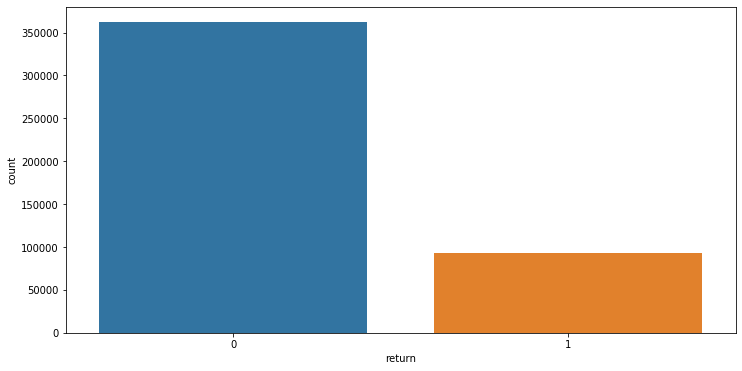

In [10]:
t.categorical_analysis(df2,'return')

CUSTOMER_APP          335707
AGENT_APP              65241
TELESALES_COMMANDO     52196
ADMIN_COMMANDO          1660
Name: channel, dtype: int64


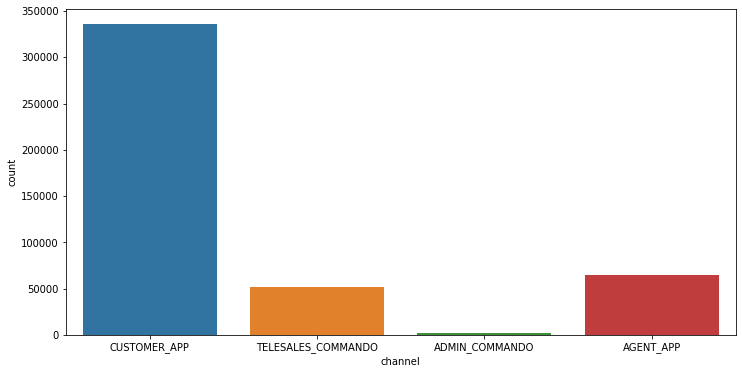

In [11]:
t.categorical_analysis(df,'channel')

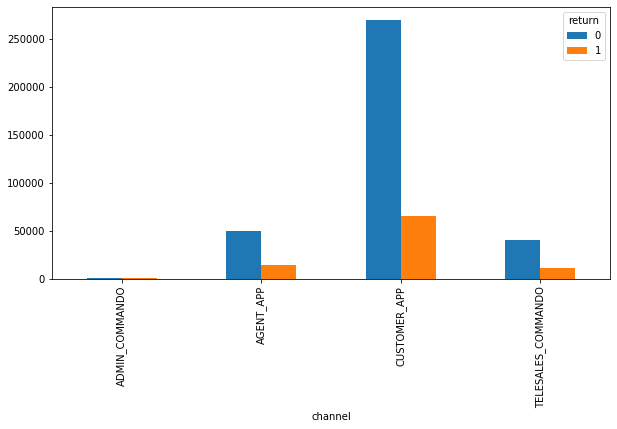

In [12]:
ov=pd.crosstab(df['channel'],df['return'])
ov.plot.bar(figsize=(10,5))

In [13]:
t2.chi_square_test(df,'channel')

Enter target variablereturn
channel
p value is 8.432271208592472e-147
Dependent (reject H0)




Although graphs suggest that there is no relation between channel and return of items but chi square test has shown that there is indeed a relationship

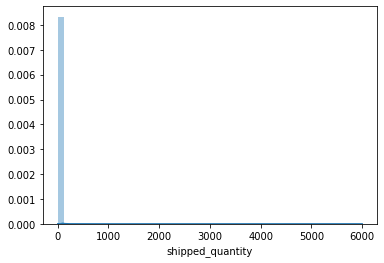

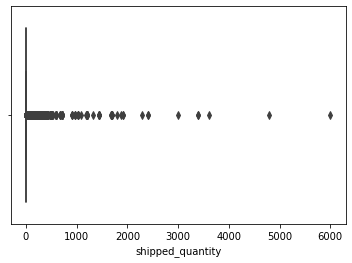

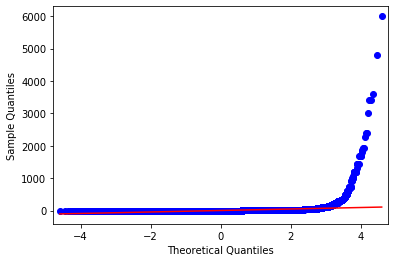

count    454804.000000
mean          4.099049
std          23.036212
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        6000.000000
Name: shipped_quantity, dtype: float64

Skew is 112.935705281037
Kurtosis is 20146.191649938704
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.057,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=128743.252
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.918 critical value at 2.5 level of significance
Probably Not Normally distributed 1.092 critical value at 1.0 level of significance


Chi square Normality test
stat=58879256.792,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality


E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.446,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.841,p=0.000

Not normally distributed according to Kolmogorov-Smirnov test


In [14]:
t.numerical_analysis(df,'shipped_quantity')

In [15]:
t.anova(df,'shipped_quantity','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,6.948527e+03,6948.526669,13.094296,0.000296
Residual,454802.0,2.413420e+08,530.652956,NaN,NaN


Test results show that shipped quantity affects the return as the p value is less than 0.05

DELIVERED              453827
PARTIALLY_DELIVERED       977
Name: shipped_status, dtype: int64


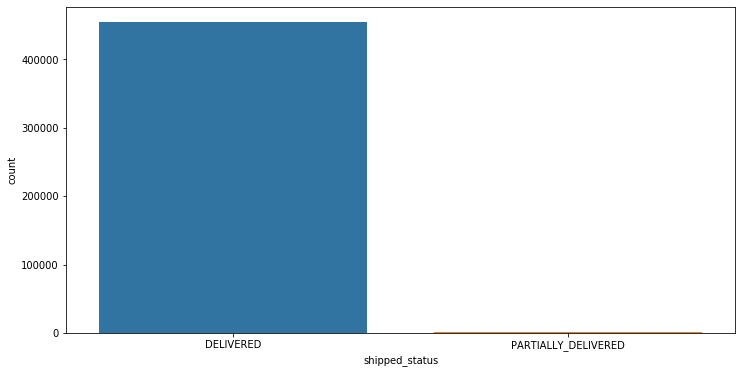

In [16]:
t.categorical_analysis(df,'shipped_status')

Shipped status is of no use in this analysis

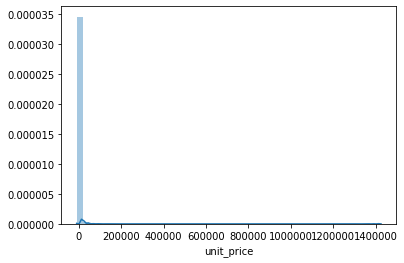

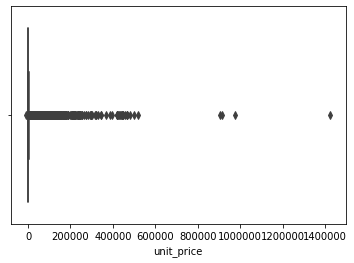

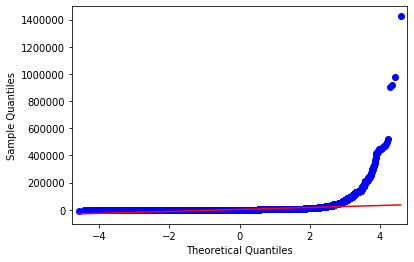

count    4.548040e+05
mean     1.753900e+03
std      7.205905e+03
min     -1.000000e+04
25%      2.540000e+02
50%      5.660000e+02
75%      1.380000e+03
max      1.425000e+06
Name: unit_price, dtype: float64

Skew is 51.87770317525267
Kurtosis is 6116.106176743661
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.146,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=108975.383

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.918 critical value at 2.5 level of significance
Probably Not Normally distributed 1.092 critical value at 1.0 level of significance


Chi square Normality test
stat=13464662709.033,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.403,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.998,p=0.000

Not normally distributed according to Kolmogorov-Smirnov test


In [17]:
t2.numerical_analysis(df,'unit_price')

In [18]:
t.anova(df,'unit_price','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,1.346075e+08,1.346075e+08,2.59235,0.107382
Residual,454802.0,2.361554e+13,5.192489e+07,NaN,NaN


ANOVA results show that unit price does not have a significant relationship with return

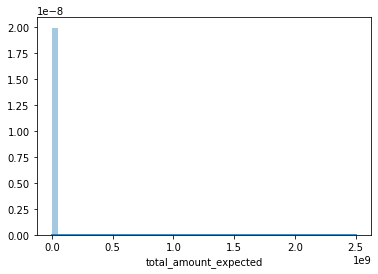

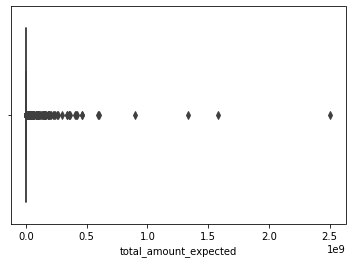

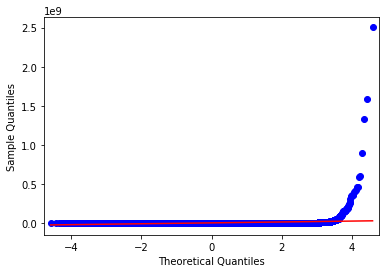

count    4.548040e+05
mean     6.894447e+04
std      5.719602e+06
min     -1.000000e+06
25%      4.380000e+02
50%      1.136000e+03
75%      3.880000e+03
max      2.505060e+09
Name: total_amount_expected, dtype: float64

Skew is 282.275508669736
Kurtosis is 102723.98951730256
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.002,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=173504.652

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.918 critical value at 2.5 level of significance
Probably Not Normally distributed 1.092 critical value at 1.0 level of significance


Chi square Normality test
stat=215802000085857.125,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.495,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.998,p=0.000

Not normally distributed according to Kolmogorov-Smirnov test


In [19]:
t2.numerical_analysis(df,'total_amount_expected')

In [20]:
t.anova(df,'total_amount_expected','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,5.746897e+14,5.746897e+14,17.567811,0.000028
Residual,454802.0,1.487778e+19,3.271265e+13,NaN,NaN


Amount expected affects the return of items

In [21]:
t.anova(df,'lat','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,1.511857e+05,151185.694055,1328.793695,1.649428e-290
Residual,454802.0,5.174585e+07,113.776649,NaN,NaN


Location which has been recorded via latitiude and longitude affects the return according to ANOVA test

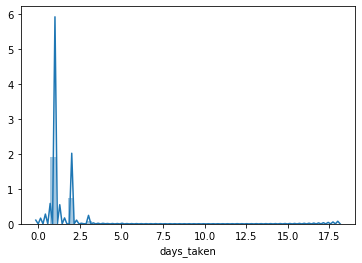

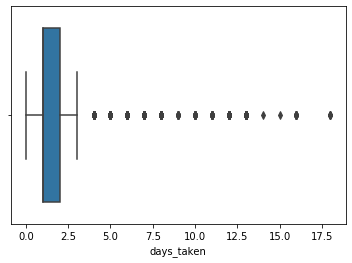

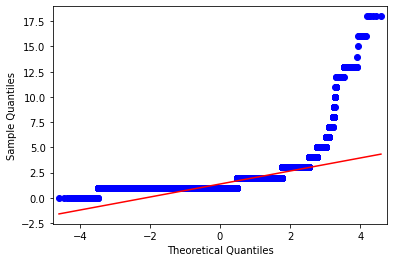

count    454804.00000
mean          1.36123
std           0.64568
min           0.00000
25%           1.00000
50%           1.00000
75%           2.00000
max          18.00000
Name: days_taken, dtype: float64

Skew is 4.4473839257156245
Kurtosis is 57.29931748530626
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.552,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=72611.479
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.918 critical value at 2.5 level of significance
Probably Not Normally distributed 1.092 critical value at 1.0 level of significance


Chi square Normality test
stat=139292.246,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality


E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.403,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.841,p=0.000

Not normally distributed according to Kolmogorov-Smirnov test


In [22]:
t.numerical_analysis(df,'days_taken')

In [23]:
t.anova(df,'days_taken','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,392.429317,392.429317,943.246134,6.359574e-207
Residual,454802.0,189216.400638,0.416041,NaN,NaN


Days taken for delivery to occur and return have a significant relationship

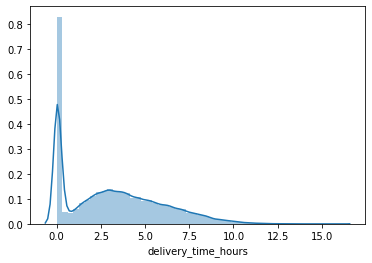

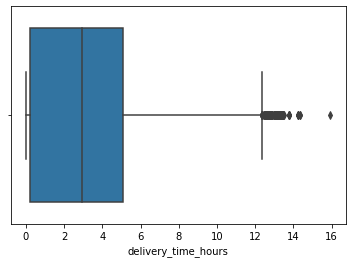

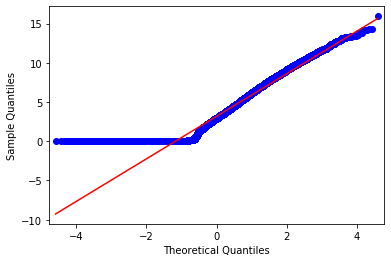

count    454804.000000
mean          3.182537
std           2.711310
min           0.000000
25%           0.200000
50%           2.933333
75%           5.068750
max          15.933333
Name: delivery_time_hours, dtype: float64

Skew is 0.5493304601156268
Kurtosis is -0.48931631506934226
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.926,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=9084.282
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.918 critical value at 2.5 level of significance
Probably Not Normally distributed 1.092 critical value at 1.0 level of significance


Chi square Normality test
stat=1050529.223,p=0.000

Not Normally distributed according to chisquare test


Lilliefors Test for Normality


E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat=0.120,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.606,p=0.000

Not normally distributed according to Kolmogorov-Smirnov test


In [24]:
t2.numerical_analysis(df,'delivery_time_hours')

In [25]:
t.anova(df,'delivery_time_hours','return')

,df,sum_sq,mean_sq,F,PR(>F)
"C(Q(""return""))",1.0,5.252537e+02,525.253660,71.462479,2.833973e-17
Residual,454802.0,3.342823e+06,7.350062,NaN,NaN


Delivery time from warehouse to location affects return according to ANOVA test

Dairy                63219
Branded Masala       49210
Beverages            48114
Snacks               42509
Personal Care        41287
Safai                40713
Aata                 24338
Oil aur Ghee         24006
Chai aur Coffee      20812
Cheeni               19318
Noodles              18781
Daal                 14138
Chaawal              12812
Baby Care            11880
Sauces                8252
Masala                4298
Anaaj                 3758
Mobile Balance        3387
Cheeni aur Namak      2507
Discount               899
Corona Essentials      533
Combo                   22
Khulla Masala           11
Name: Category, dtype: int64


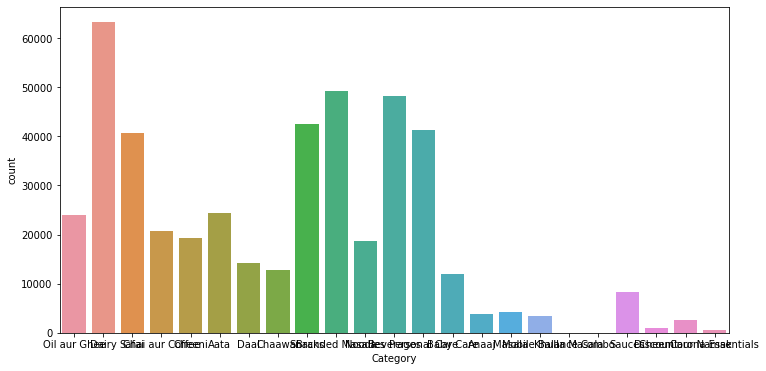

In [26]:
t2.categorical_analysis(df,'Category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

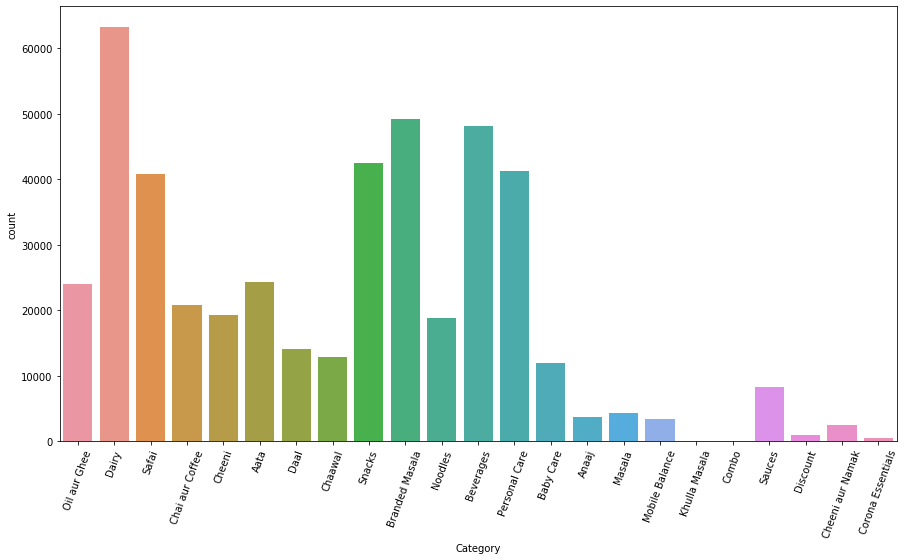

In [27]:
plt.subplots(figsize=(15,8))
sns.countplot(df['Category'])
plt.xticks(rotation=70)


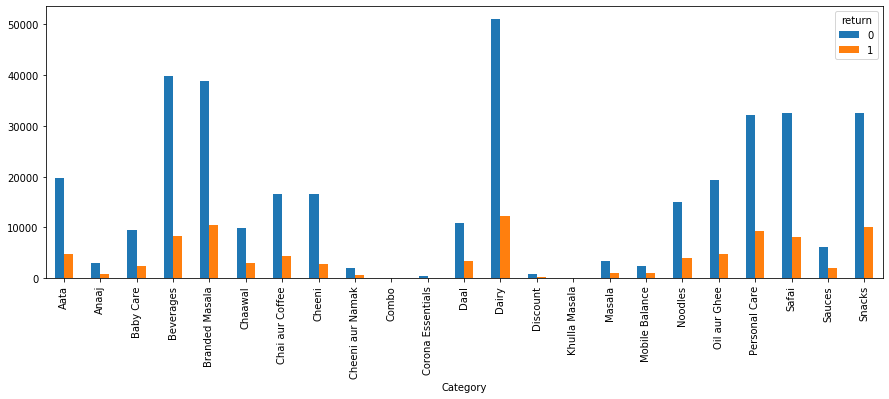

In [28]:
ov=pd.crosstab(df['Category'],df['return'])
ov.plot.bar(figsize=(15,5))

Dairy and snacks show highest return percentage

In [29]:
t2.chi_square_test(df,'Category')

Enter target variablereturn
Category
p value is 0.0
Dependent (reject H0)




Chi square test shows Catgeory affects the return 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text xticklabel objects>)

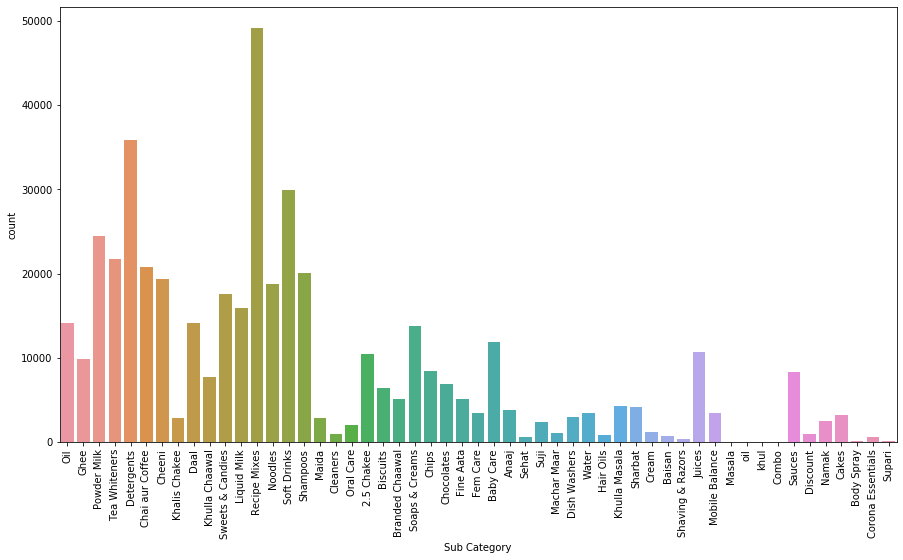

In [30]:
plt.subplots(figsize=(15,8))
sns.countplot(df['Sub Category'])
plt.xticks(rotation=90)

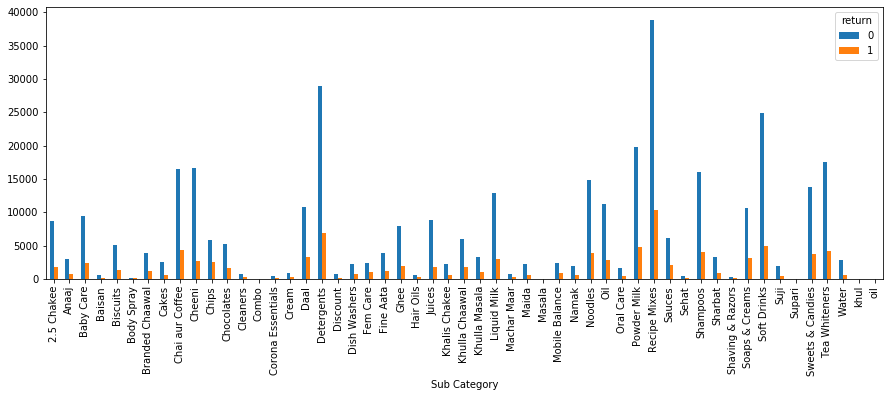

In [31]:
ov=pd.crosstab(df['Sub Category'],df['return'])
ov.plot.bar(figsize=(15,5))

Recipe Mixes show the highest rate of return 

In [32]:
t2.chi_square_test(df,'Sub Category')

Enter target variablereturn
Sub Category
p value is 0.0
Dependent (reject H0)




Sub Category and return are related according to chi square test

Extracting new features

In [72]:
import datetime
import calendar
  
def findDay(date):
    d=date[0:10]
    born = datetime.datetime.strptime(d, '%d/%m/%Y').weekday()
    return (calendar.day_name[born])
  
# Driver program
date = '21/05/2021'
print(findDay(date))

Friday


In [34]:
df2=t.deep_copy(df)

In [46]:
t2.change_type(df2,'order_date','datetime')


In [36]:
df2['order_date'] = df2['order_date'].dt.strftime('%d/%m/%Y')

In [37]:
df2['order_date'].iloc[0]

'30/12/2020'

In [38]:
df2['order_day']=df2['order_date'].map(findDay)

In [39]:
df2

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,shipped_quantity,delivered_quantity,shipped_status,delivered_status,unit_price,total_amount_expected,order_date,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category,order_day
0,Abdul ahad,"Makhdooom Bilawal Main Rd, Gulzar-e-Hijri Sect...",CUSTOMER_APP,2020-12-30 13:44:1609335875,2021-01-09 10:45:1610189149,2021-01-09 18:40:1610217631,0.000000,0.00000,1668,Mezan Canola Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,117000.0,11700000.0,30/12/2020,2021-05-20 13:44:00,2021-01-09 00:00:00,2021-05-20 10:45:00,2021-01-09 00:00:00,2021-05-20 18:40:00,10.0,7.916667,0,Oil aur Ghee,Oil,Wednesday
4,Malik Kashif,"St 16, Block 8, Karachi Administration Employe...",CUSTOMER_APP,2020-12-31 15:47:1609429634,2021-01-09 09:27:1610184450,2021-01-09 11:59:1610193550,0.000000,0.00000,1302,Ahla Banaspati Ghee 900 gm Carton,10,10,DELIVERED,DELIVERED,24000.0,240000.0,31/12/2020,2021-05-20 15:47:00,2021-01-09 00:00:00,2021-05-20 09:27:00,2021-01-09 00:00:00,2021-05-20 11:59:00,9.0,2.533333,0,Oil aur Ghee,Ghee,Thursday
5,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1252,Dalda Banaspati Ghee 1 Kg Carton,50,50,DELIVERED,DELIVERED,64000.0,3200000.0,31/12/2020,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Ghee,Thursday
6,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1253,Dalda Cooking Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,128000.0,12800000.0,31/12/2020,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday
7,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1260,Tullo Cooking Oil 1 Litre Carton,25,25,PARTIALLY_DELIVERED,PARTIALLY_DELIVERED,58000.0,1450000.0,31/12/2020,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501320,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5914112688284,Hamdard Rooh Afza 800 ml,36,36,DELIVERED,DELIVERED,9180.0,330480.0,27/03/2021,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Beverages,Sharbat,Saturday
501321,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5717801435292,Nestle Everyday 375 gm Pack,3,3,DELIVERED,DELIVERED,1260.0,3780.0,27/03/2021,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Tea Whiteners,Saturday
501322,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5620416086172,Nestle Bunyad 260 gm Pack,5,5,DELIVERED,DELIVERED,1075.0,5375.0,27/03/2021,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Powder Milk,Saturday
501323,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,711809575459533000,Olper's Full Cream Milk 1.5 L Pack,40,40,DELIVERED,DELIVERED,8480.0,339200.0,27/03/2021,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-

Monday       75322
Wednesday    71634
Saturday     71265
Thursday     69636
Tuesday      69264
Friday       68187
Sunday       29496
Name: order_day, dtype: int64


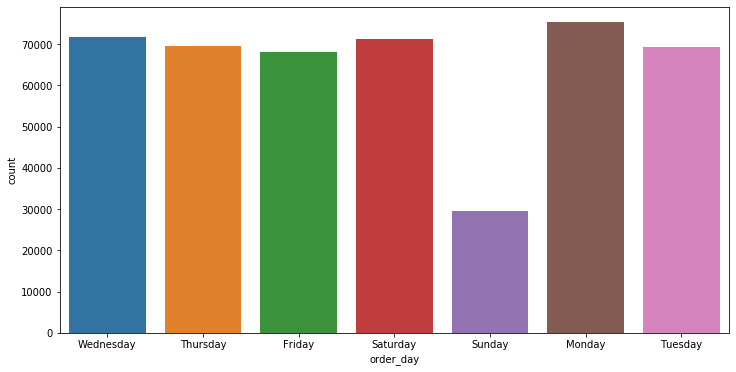

In [40]:
t.categorical_analysis(df2,'order_day')

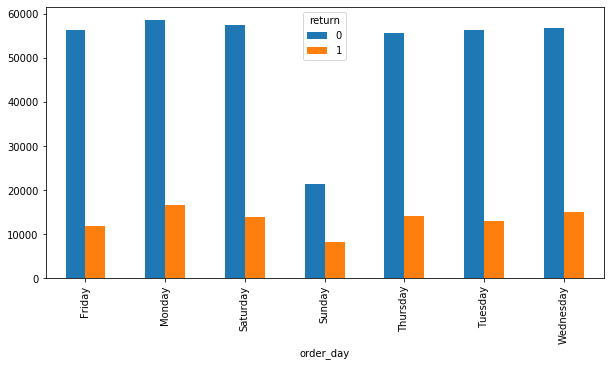

In [41]:
ov=pd.crosstab(df2['order_day'],df2['return'])
ov.plot.bar(figsize=(10,5))

orders placed on sunday tend be returned more


In [42]:
t2.chi_square_test(df2,'order_day')

Enter target variablereturn
order_day
p value is 0.0
Dependent (reject H0)




In [43]:
from datetime import datetime  
from datetime import timedelta  

In [47]:
df2.dtypes

customer_store_name                  object
customer_shipping_address            object
channel                              object
order_placement_date                 object
picked_timestamp                     object
drop_timestamp                       object
lat                                 float64
lng                                 float64
item_id                               int64
item_name                            object
shipped_quantity                      int64
delivered_quantity                    int64
shipped_status                       object
delivered_status                     object
unit_price                          float64
total_amount_expected               float64
order_date                   datetime64[ns]
order_time                           object
picked_date                          object
picked_time                          object
drop_date                            object
drop_time                            object
days_taken                      

In [52]:
t.missing_details(df2)

,"Missing value, %",Missing value count,N unique value
customer_store_name,0.0,0,9219
customer_shipping_address,0.0,0,8462
channel,0.0,0,4
order_placement_date,0.0,0,123270
picked_timestamp,0.0,0,122143
drop_timestamp,0.0,0,102596
lat,0.0,0,10598
lng,0.0,0,9116
item_id,0.0,0,2019
item_name,0.0,0,882


In [56]:
df2['days_taken'].iloc[0]

10.0

In [60]:
df3=t2.deep_copy(df2)

In [51]:
df2['order_date'].iloc[0]++timedelta(days=1)

Timestamp('2020-12-31 00:00:00')

Extracting received date

In [64]:
df3['r_date']=df3['order_date']+pd.to_timedelta(df3['days_taken'],unit='day')

In [66]:
df3['r_date'] = df3['r_date'].dt.strftime('%d/%m/%Y')

In [70]:
df3['r_date'].iloc[0]

'09/01/2021'

In [73]:
findDay('09/01/2021')

'Saturday'

In [74]:
df3['r_day']=df3['r_date'].map(findDay)

In [75]:
df3

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,shipped_quantity,delivered_quantity,shipped_status,delivered_status,unit_price,total_amount_expected,order_date,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category,order_day,r_date,r_day
0,Abdul ahad,"Makhdooom Bilawal Main Rd, Gulzar-e-Hijri Sect...",CUSTOMER_APP,2020-12-30 13:44:1609335875,2021-01-09 10:45:1610189149,2021-01-09 18:40:1610217631,0.000000,0.00000,1668,Mezan Canola Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,117000.0,11700000.0,2020-12-30,2021-05-20 13:44:00,2021-01-09 00:00:00,2021-05-20 10:45:00,2021-01-09 00:00:00,2021-05-20 18:40:00,10.0,7.916667,0,Oil aur Ghee,Oil,Wednesday,09/01/2021,Saturday
4,Malik Kashif,"St 16, Block 8, Karachi Administration Employe...",CUSTOMER_APP,2020-12-31 15:47:1609429634,2021-01-09 09:27:1610184450,2021-01-09 11:59:1610193550,0.000000,0.00000,1302,Ahla Banaspati Ghee 900 gm Carton,10,10,DELIVERED,DELIVERED,24000.0,240000.0,2020-12-31,2021-05-20 15:47:00,2021-01-09 00:00:00,2021-05-20 09:27:00,2021-01-09 00:00:00,2021-05-20 11:59:00,9.0,2.533333,0,Oil aur Ghee,Ghee,Thursday,09/01/2021,Saturday
5,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1252,Dalda Banaspati Ghee 1 Kg Carton,50,50,DELIVERED,DELIVERED,64000.0,3200000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Ghee,Thursday,09/01/2021,Saturday
6,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1253,Dalda Cooking Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,128000.0,12800000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,09/01/2021,Saturday
7,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1260,Tullo Cooking Oil 1 Litre Carton,25,25,PARTIALLY_DELIVERED,PARTIALLY_DELIVERED,58000.0,1450000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,09/01/2021,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501320,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5914112688284,Hamdard Rooh Afza 800 ml,36,36,DELIVERED,DELIVERED,9180.0,330480.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Beverages,Sharbat,Saturday,28/03/2021,Sunday
501321,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5717801435292,Nestle Everyday 375 gm Pack,3,3,DELIVERED,DELIVERED,1260.0,3780.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Tea Whiteners,Saturday,28/03/2021,Sunday
501322,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5620416086172,Nestle Bunyad 260 gm Pack,5,5,DELIVERED,DELIVERED,1075.0,5375.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Powder Milk,Saturday,28/03/2021,Sunday
501323,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.026

Monday       74683
Friday       73950
Tuesday      72178
Thursday     67458
Saturday     65872
Wednesday    64383
Sunday       36280
Name: r_day, dtype: int64


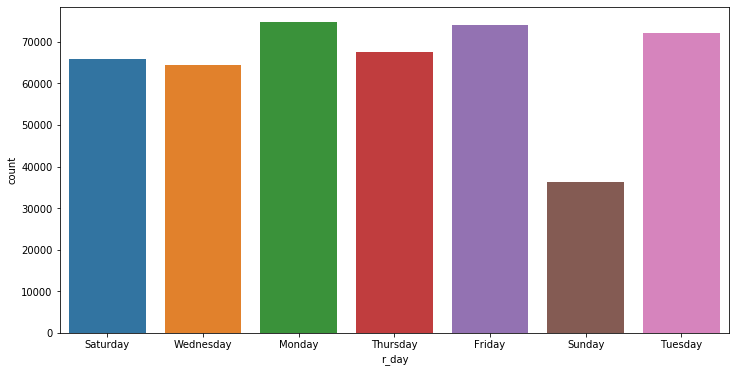

In [76]:
t2.categorical_analysis(df3,'r_day')

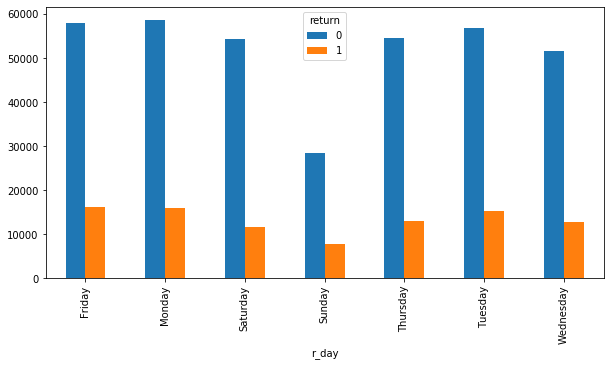

In [78]:
ov=pd.crosstab(df3['r_day'],df3['return'])
ov.plot.bar(figsize=(10,5))

Orders recieved on sundays tend to be returned more

In [80]:
t2.chi_square_test(df3,'r_day')

Enter target variablereturn
r_day
p value is 5.281833719123788e-121
Dependent (reject H0)




The feature affects return as proved by crosstab and chi square test

Dropping all unnecessary columns

In [82]:
df3

,customer_store_name,customer_shipping_address,channel,order_placement_date,picked_timestamp,drop_timestamp,lat,lng,item_id,item_name,shipped_quantity,delivered_quantity,shipped_status,delivered_status,unit_price,total_amount_expected,order_date,order_time,picked_date,picked_time,drop_date,drop_time,days_taken,delivery_time_hours,return,Category,Sub Category,order_day,r_date,r_day
0,Abdul ahad,"Makhdooom Bilawal Main Rd, Gulzar-e-Hijri Sect...",CUSTOMER_APP,2020-12-30 13:44:1609335875,2021-01-09 10:45:1610189149,2021-01-09 18:40:1610217631,0.000000,0.00000,1668,Mezan Canola Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,117000.0,11700000.0,2020-12-30,2021-05-20 13:44:00,2021-01-09 00:00:00,2021-05-20 10:45:00,2021-01-09 00:00:00,2021-05-20 18:40:00,10.0,7.916667,0,Oil aur Ghee,Oil,Wednesday,09/01/2021,Saturday
4,Malik Kashif,"St 16, Block 8, Karachi Administration Employe...",CUSTOMER_APP,2020-12-31 15:47:1609429634,2021-01-09 09:27:1610184450,2021-01-09 11:59:1610193550,0.000000,0.00000,1302,Ahla Banaspati Ghee 900 gm Carton,10,10,DELIVERED,DELIVERED,24000.0,240000.0,2020-12-31,2021-05-20 15:47:00,2021-01-09 00:00:00,2021-05-20 09:27:00,2021-01-09 00:00:00,2021-05-20 11:59:00,9.0,2.533333,0,Oil aur Ghee,Ghee,Thursday,09/01/2021,Saturday
5,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1252,Dalda Banaspati Ghee 1 Kg Carton,50,50,DELIVERED,DELIVERED,64000.0,3200000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Ghee,Thursday,09/01/2021,Saturday
6,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1253,Dalda Cooking Oil 1 Litre Carton,100,100,DELIVERED,DELIVERED,128000.0,12800000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,09/01/2021,Saturday
7,Umair oil depu,Block 6 Liaquatabad Town,CUSTOMER_APP,2020-12-31 08:02:1609401757,2021-01-09 10:22:1610187765,2021-01-09 12:36:1610195766,0.000000,0.00000,1260,Tullo Cooking Oil 1 Litre Carton,25,25,PARTIALLY_DELIVERED,PARTIALLY_DELIVERED,58000.0,1450000.0,2020-12-31,2021-05-20 08:02:00,2021-01-09 00:00:00,2021-05-20 10:22:00,2021-01-09 00:00:00,2021-05-20 12:36:00,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,09/01/2021,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501320,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5914112688284,Hamdard Rooh Afza 800 ml,36,36,DELIVERED,DELIVERED,9180.0,330480.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Beverages,Sharbat,Saturday,28/03/2021,Sunday
501321,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5717801435292,Nestle Everyday 375 gm Pack,3,3,DELIVERED,DELIVERED,1260.0,3780.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Tea Whiteners,Saturday,28/03/2021,Sunday
501322,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.02645,5620416086172,Nestle Bunyad 260 gm Pack,5,5,DELIVERED,DELIVERED,1075.0,5375.0,2021-03-27,2021-05-20 07:10:00,2021-03-28 00:00:00,2021-05-20 03:29:00,2021-03-28 00:00:00,2021-05-20 06:25:00,1.0,2.933333,0,Dairy,Powder Milk,Saturday,28/03/2021,Sunday
501323,Makkah Cold,Block 3 Nazimabad,CUSTOMER_APP,2021-03-27 07:10:1616829013,2021-03-28 03:29:1616902155,2021-03-28 06:25:1616912703,24.915066,67.026

In [81]:
df3.columns

Index(['customer_store_name', 'customer_shipping_address', 'channel',
       'order_placement_date', 'picked_timestamp', 'drop_timestamp', 'lat',
       'lng', 'item_id', 'item_name', 'shipped_quantity', 'delivered_quantity',
       'shipped_status', 'delivered_status', 'unit_price',
       'total_amount_expected', 'order_date', 'order_time', 'picked_date',
       'picked_time', 'drop_date', 'drop_time', 'days_taken',
       'delivery_time_hours', 'return', 'Category', 'Sub Category',
       'order_day', 'r_date', 'r_day'],
      dtype='object')

In [83]:
df4=t2.deep_copy(df3)

Dropping useless columns

In [84]:
t2.remove_cols(df4,'customer_store_name', 'customer_shipping_address','order_placement_date', 'picked_timestamp', 'drop_timestamp','item_id', 'item_name','delivered_quantity','shipped_status', 'delivered_status','order_date', 'order_time', 'picked_date','picked_time', 'drop_date', 'drop_time','r_date')

In [87]:
df4

,channel,lat,lng,shipped_quantity,unit_price,total_amount_expected,days_taken,delivery_time_hours,return,Category,Sub Category,order_day,r_day
0,CUSTOMER_APP,0.000000,0.00000,100,117000.0,11700000.0,10.0,7.916667,0,Oil aur Ghee,Oil,Wednesday,Saturday
4,CUSTOMER_APP,0.000000,0.00000,10,24000.0,240000.0,9.0,2.533333,0,Oil aur Ghee,Ghee,Thursday,Saturday
5,CUSTOMER_APP,0.000000,0.00000,50,64000.0,3200000.0,9.0,2.233333,0,Oil aur Ghee,Ghee,Thursday,Saturday
6,CUSTOMER_APP,0.000000,0.00000,100,128000.0,12800000.0,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,Saturday
7,CUSTOMER_APP,0.000000,0.00000,25,58000.0,1450000.0,9.0,2.233333,0,Oil aur Ghee,Oil,Thursday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501320,CUSTOMER_APP,24.915066,67.02645,36,9180.0,330480.0,1.0,2.933333,0,Beverages,Sharbat,Saturday,Sunday
501321,CUSTOMER_APP,24.915066,67.02645,3,1260.0,3780.0,1.0,2.933333,0,Dairy,Tea Whiteners,Saturday,Sunday
501322,CUSTOMER_APP,24.915066,67.02645,5,1075.0,5375.0,1.0,2.933333,0,Dairy,Powder Milk,Saturday,Sunday
501323,CUSTOMER_APP,24.915066,67.02645,40,8480.0,339200.0,1.0,2.933333,0,Dairy,Liquid Milk,Saturday,Sunday


In [88]:
df4.to_csv('model_data.csv',index=False)